# Importing Modules

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Loading Datasets

In [4]:
walmart_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\Walmart Data Analysis and Forcasting.csv")
calendar_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\calendar.csv")
sales_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sales_train_validation.csv")
prices_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sell_prices.csv")
sample_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sample_submission.csv")
sales_eval_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sales_train_evaluation.csv")

# Data Preview

<h4>Check rows and columns

In [5]:
print("Walmart Data Shape:", walmart_data.shape)
print("Calendar Data Shape:", calendar_data.shape)
print("Sales Data Shape:", sales_data.shape)
print("Prices Data Shape:", prices_data.shape)
print("Sample Submission Data Shape:", sample_data.shape)
print("Sales Evaluation Data Shape:", sales_eval_data.shape)

Walmart Data Shape: (6435, 8)
Calendar Data Shape: (1969, 14)
Sales Data Shape: (30490, 1919)
Prices Data Shape: (6841121, 4)
Sample Submission Data Shape: (60980, 29)
Sales Evaluation Data Shape: (30490, 1947)


<h4> Understanding data

In [6]:
print("Walmart Data:")
print(walmart_data.head())

Walmart Data:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
print("\nCalendar Data:")
print(calendar_data.head())


Calendar Data:
         date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1  


In [8]:
print("\nSales Data:")
print(sales_data.head())


Sales Data:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_19

In [9]:
print("\nPrices Data:")
print(prices_data.head())



Prices Data:
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26


In [10]:
print("\nSample Submission Data:")
print(sample_data.head())


Sample Submission Data:
                              id  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  \
0  HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
1  HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
2  HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
3  HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
4  HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   

   F19  F20  F21  F22  F23  F24  F25  F26  F27  F28  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]


In [11]:
print("\nSales Evaluation Data:")
print(sales_eval_data.head())


Sales Evaluation Data:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d

<h4> Check Data types

In [15]:
print(walmart_data.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [16]:
print(calendar_data.dtypes)

date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object


In [18]:
print(sales_data.dtypes)

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1909       int64
d_1910       int64
d_1911       int64
d_1912       int64
d_1913       int64
Length: 1919, dtype: object


In [19]:
print(prices_data.dtypes)

store_id       object
item_id        object
wm_yr_wk        int64
sell_price    float64
dtype: object


In [20]:
print(sample_data.dtypes)

id     object
F1      int64
F2      int64
F3      int64
F4      int64
F5      int64
F6      int64
F7      int64
F8      int64
F9      int64
F10     int64
F11     int64
F12     int64
F13     int64
F14     int64
F15     int64
F16     int64
F17     int64
F18     int64
F19     int64
F20     int64
F21     int64
F22     int64
F23     int64
F24     int64
F25     int64
F26     int64
F27     int64
F28     int64
dtype: object


In [21]:
print(sales_eval_data.dtypes)

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1937       int64
d_1938       int64
d_1939       int64
d_1940       int64
d_1941       int64
Length: 1947, dtype: object


# Data Cleaning

<h3> Remove Duplicates

In [26]:
# Function to check and remove duplicates
def remove_duplicates(df, name):
    print(f"\n{name} - Before cleaning:")
    print(f"Number of duplicate rows: {df.duplicated().sum()}")

    df_cleaned = df.drop_duplicates()
    
    print(f"{name} - After cleaning:")
    print(f"Number of duplicate rows: {df_cleaned.duplicated().sum()}")
    
    return df_cleaned

# Remove duplicates from each dataset
walmart_data_cleaned = remove_duplicates(walmart_data, "Walmart Data")
calendar_data_cleaned = remove_duplicates(calendar_data, "Calendar Data")
sales_data_cleaned = remove_duplicates(sales_data, "Sales Data")
prices_data_cleaned = remove_duplicates(prices_data, "Prices Data")
sample_data_cleaned = remove_duplicates(sample_data, "Sample Submission Data")
sales_eval_data_cleaned = remove_duplicates(sales_eval_data, "Sales Evaluation Data")


Walmart Data - Before cleaning:
Number of duplicate rows: 0
Walmart Data - After cleaning:
Number of duplicate rows: 0

Calendar Data - Before cleaning:
Number of duplicate rows: 0
Calendar Data - After cleaning:
Number of duplicate rows: 0

Sales Data - Before cleaning:
Number of duplicate rows: 0
Sales Data - After cleaning:
Number of duplicate rows: 0

Prices Data - Before cleaning:
Number of duplicate rows: 0
Prices Data - After cleaning:
Number of duplicate rows: 0

Sample Submission Data - Before cleaning:
Number of duplicate rows: 0
Sample Submission Data - After cleaning:
Number of duplicate rows: 0

Sales Evaluation Data - Before cleaning:
Number of duplicate rows: 0
Sales Evaluation Data - After cleaning:
Number of duplicate rows: 0


<h3> Handle Missing Values

In [27]:
walmart_data.dropna(inplace=True)
sales_data.dropna(inplace=True)
prices_data.dropna(inplace=True)
sample_data.dropna(inplace=True)
sales_eval_data.dropna(inplace=True)

In [28]:
print("Walmart Data:", walmart_data.shape[0], "rows remaining")
print("Sales Data:", sales_data.shape[0], "rows remaining")
print("Prices Data:", prices_data.shape[0], "rows remaining")
print("Sample Submission Data:", sample_data.shape[0], "rows remaining")
print("Sales Evaluation Data:", sales_eval_data.shape[0], "rows remaining")

Walmart Data: 6435 rows remaining
Sales Data: 30490 rows remaining
Prices Data: 6841121 rows remaining
Sample Submission Data: 60980 rows remaining
Sales Evaluation Data: 30490 rows remaining


In [29]:
calendar_data.drop(columns=['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], inplace=True)

In [30]:

print("Calendar Data:",calendar_data.shape[0], "rows remaining")

Calendar Data: 1969 rows remaining


# Data Integration

<h3> Merge Datasets

Walmart Data with Calendar Data:

Merging on Date from Walmart Data and date from Calendar Data.
Converting Date and date to a common format.

In [32]:
# Convert date columns to datetime
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')
calendar_data['date'] = pd.to_datetime(calendar_data['date'])

# Merge datasets
merged_walmart_calendar = pd.merge(walmart_data, calendar_data, left_on='Date', right_on='date')

# Print merged data
print(merged_walmart_calendar.head())


   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2011-02-04    1606629.58             0        42.27       2.989   
1      2 2011-02-04    1929346.23             0        38.25       2.989   
2      3 2011-02-04     438516.53             0        45.95       2.989   
3      4 2011-02-04    2119086.04             0        34.61       2.996   
4      5 2011-02-04     329613.20             0        41.67       2.989   

          CPI  Unemployment       date  wm_yr_wk weekday  wday  month  year  \
0  212.566881         7.742 2011-02-04     11101  Friday     7      2  2011   
1  212.224065         8.028 2011-02-04     11101  Friday     7      2  2011   
2  215.886337         7.551 2011-02-04     11101  Friday     7      2  2011   
3  127.719581         6.510 2011-02-04     11101  Friday     7      2  2011   
4  213.122975         6.634 2011-02-04     11101  Friday     7      2  2011   

     d  snap_CA  snap_TX  snap_WI  
0  d_7        1        0        

In [36]:
columns_to_drop = ['d', 'snap_CA', 'snap_TX', 'snap_WI']
merged_walmart_calendar_cleaned = merged_walmart_calendar.drop(columns=columns_to_drop)

print("Columns in merged_walmart_calendar_cleaned:\n")
print(merged_walmart_calendar_cleaned.columns)

print("\nFirst few rows of merged_walmart_calendar_cleaned:\n")
print(merged_walmart_calendar_cleaned.head())

Columns in merged_walmart_calendar_cleaned:

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'date', 'wm_yr_wk', 'weekday',
       'wday', 'month', 'year'],
      dtype='object')

First few rows of merged_walmart_calendar_cleaned:

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2011-02-04    1606629.58             0        42.27       2.989   
1      2 2011-02-04    1929346.23             0        38.25       2.989   
2      3 2011-02-04     438516.53             0        45.95       2.989   
3      4 2011-02-04    2119086.04             0        34.61       2.996   
4      5 2011-02-04     329613.20             0        41.67       2.989   

          CPI  Unemployment       date  wm_yr_wk weekday  wday  month  year  
0  212.566881         7.742 2011-02-04     11101  Friday     7      2  2011  
1  212.224065         8.028 2011-02-04     11101  Friday     7      2  2011  
2  215.886

In [37]:
print("Merged Walmart-Calendar Data Shape:", merged_walmart_calendar.shape)

Merged Walmart-Calendar Data Shape: (4095, 18)


In [39]:
print("Sales Data Columns:\n", sales_data.columns)
print("\nPrices Data Columns:\n", prices_data.columns)


Sales Data Columns:
 Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)

Prices Data Columns:
 Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object')


In [41]:
sales_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sales_train_validation.csv", usecols=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])  
prices_data = pd.read_csv(r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sell_prices.csv", usecols=['store_id', 'item_id', 'wm_yr_wk', 'sell_price'])  


In [42]:
sales_data_dropped = sales_data.iloc[::2].reset_index(drop=True)
print("Shape of sales_data after dropping every 2nd row:", sales_data_dropped.shape)

Shape of sales_data after dropping every 2nd row: (15245, 6)


In [43]:
sales_file_path = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sales_train_validation.csv"
prices_file_path = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sell_prices.csv"

prices_data = pd.read_csv(prices_file_path, usecols=['store_id', 'item_id', 'wm_yr_wk', 'sell_price'])

# Drop every 2nd row from prices_data
prices_data_dropped = prices_data.iloc[::2].reset_index(drop=True)

# Read sales data in chunks
chunksize = 10**6
sales_data_chunks = pd.read_csv(sales_file_path, usecols=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], chunksize=chunksize)

merged_chunks = []

# Process each chunk
for chunk_index, sales_chunk in enumerate(sales_data_chunks):
    print(f"Processing chunk {chunk_index + 1}")
    
    # Merge with the dropped prices data
    merged_chunk = pd.merge(sales_chunk, prices_data_dropped, on=['store_id', 'item_id'], how='inner')

    print(f"Shape of merged_chunk: {merged_chunk.shape}")
    if not merged_chunk.empty:
        print(merged_chunk.head())
   
    merged_chunks.append(merged_chunk)

# Concatenate all merged chunks
if merged_chunks:
    merged_sales_prices = pd.concat(merged_chunks, ignore_index=True)
    print("Shape of merged_sales_prices Data:", merged_sales_prices.shape)
else:
    print("No merged chunks available to concatenate.")


Processing chunk 1
Shape of merged_chunk: (3420561, 8)
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   

  state_id  wm_yr_wk  sell_price  
0       CA     11325        9.58  
1       CA     11327        8.26  
2       CA     11329        8.26  
3       CA     11331        8.26  
4       CA     11333        8.26  
Shape of merged_sales_prices Data: (3420561, 8)


In [44]:
print("Columns in merged_walmart_calendar:")
print(merged_walmart_calendar.columns)

print("\nColumns in merged_sales_prices:")
print(merged_sales_prices.columns)

Columns in merged_walmart_calendar:
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'date', 'wm_yr_wk', 'weekday',
       'wday', 'month', 'year', 'd', 'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

Columns in merged_sales_prices:
Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
       'wm_yr_wk', 'sell_price'],
      dtype='object')


In [45]:
# Ensure the 'Date' columns are in datetime format
merged_walmart_calendar['Date'] = pd.to_datetime(merged_walmart_calendar['Date'])

In [46]:
sales_prices_output_path = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sales_train_validation.csv"
walmart_calendar_output_path = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\Walmart Data Analysis and Forcasting.csv"

merged_sales_prices.to_csv(sales_prices_output_path, index=False)
print(f"Saved merged_sales_prices to {sales_prices_output_path}")

merged_walmart_calendar.to_csv(walmart_calendar_output_path, index=False)
print(f"Saved merged_walmart_calendar to {walmart_calendar_output_path}")

Saved merged_sales_prices to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sales_train_validation.csv
Saved merged_walmart_calendar to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\Walmart Data Analysis and Forcasting.csv


In [47]:
walmart_calendar_file_path = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\Walmart Data Analysis and Forcasting.csv"

merged_walmart_calendar = pd.read_csv(walmart_calendar_file_path)

chunk_size = 10**6  
sales_prices_file_path = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\M5 forecasting\sales_train_validation.csv"

sales_prices_chunks = pd.read_csv(sales_prices_file_path, chunksize=chunk_size)

merged_results = []

for chunk_index, sales_prices_chunk in enumerate(sales_prices_chunks):
    print(f"Processing chunk {chunk_index + 1}")
    
    merged_chunk = pd.merge(sales_prices_chunk, merged_walmart_calendar, on='wm_yr_wk', how='inner')

    print(f"Shape of merged_chunk: {merged_chunk.shape}")
    if not merged_chunk.empty:
        print(merged_chunk.head())
   
    merged_results.append(merged_chunk)

if merged_results:
    final_merged_data = pd.concat(merged_results, ignore_index=True)
    print("Shape of final_merged_data:", final_merged_data.shape)
else:
    print("No merged results available to concatenate.")


Processing chunk 1
Shape of merged_chunk: (10406925, 25)
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   

  state_id  wm_yr_wk  sell_price  Store        Date  ...  Unemployment  \
0       CA     11121        3.97      1  2011-06-24  ...         7.682   
1       CA     11121        3.97      2  2011-06-24  ...         7.931   
2       CA     11121        3.97      3  2011-06-24  ...         7.574   
3       CA     11121        3.97      4  2011-06-24  ...         5.946   
4       CA     11121        3.97      5  2011-06-24  ...         6.489   

         date  we

In [51]:
merged_data_path = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\final_merged_data.csv"

final_merged_data.to_csv(merged_data_path, index=False)
print(f"Saved merged data to {merged_data_path}")

Saved merged data to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\final_merged_data.csv


Saving the processed chunk on our system

In [81]:
import os
import pandas as pd

cleaned_chunk_path_template = r"C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_{chunk_index}.csv"
directory = r'C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks'
chunk_count = 14 

def process_chunk(chunk):
    # Drop duplicates
    chunk = chunk.drop_duplicates()
    
    # Handle missing values
    for column in chunk.columns:
        if chunk[column].dtype == 'object':
            chunk[column].fillna(chunk[column].mode()[0], inplace=True)
        else:
            chunk[column].fillna(chunk[column].mean(), inplace=True)

    if 'Date' in chunk.columns:
        chunk['Date'] = pd.to_datetime(chunk['Date'])
    
    categorical_columns = ['Store', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'weekday']  
    for col in categorical_columns:
        if col in chunk.columns:
            chunk[col] = chunk[col].astype('category')
    
    return chunk

chunksize = 10**5  
chunk_index = 0

try:
    for chunk in pd.read_csv(merged_data_path, chunksize=chunksize):
        print(f"Processing chunk {chunk_index + 1}")
        
        processed_chunk = process_chunk(chunk)
        
        # Save
        cleaned_chunk_path = cleaned_chunk_path_template.format(chunk_index=chunk_index)
        processed_chunk.to_csv(cleaned_chunk_path, index=False)
        
        print(f"Saved cleaned chunk {chunk_index + 1} to {cleaned_chunk_path}")
        chunk_index += 1

except MemoryError as e:
    print(f"MemoryError encountered: {e}")

print("Data processing complete.")


for i in range(chunk_count):
    file_path = cleaned_chunk_path_template.format(chunk_index=i)
    if os.path.exists(file_path):
        print(f'Processing existing chunk {file_path}')
        chunk = pd.read_csv(file_path)
        chunk_cleaned = process_chunk(chunk)
        chunk_cleaned.to_csv(file_path, index=False)
        print(f'Saved cleaned chunk {i} to {file_path}')
    else:
        print(f'File not found: {file_path}')

print("Chunk validation and processing complete.")


Processing chunk 1
Saved cleaned chunk 1 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_0.csv
Processing chunk 2
Saved cleaned chunk 2 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_1.csv
Processing chunk 3
Saved cleaned chunk 3 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_2.csv
Processing chunk 4
Saved cleaned chunk 4 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_3.csv
Processing chunk 5
Saved cleaned chunk 5 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_4.csv
Processing chunk 6
Saved cleaned chunk 6 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_5.csv
Processing chunk 7
Saved cleaned chunk 7 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_6.csv
Processing chunk 8
Saved cleaned chunk 8 to C:\Users\khush\Documents\Project

Processing chunk 62
Saved cleaned chunk 62 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_61.csv
Processing chunk 63
Saved cleaned chunk 63 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_62.csv
Processing chunk 64
Saved cleaned chunk 64 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_63.csv
Processing chunk 65
Saved cleaned chunk 65 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_64.csv
Processing chunk 66
Saved cleaned chunk 66 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_65.csv
Processing chunk 67
Saved cleaned chunk 67 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_66.csv
Processing chunk 68
Saved cleaned chunk 68 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_67.csv
Processing chunk 69
Saved cleaned chunk 69 to C:\Users\

Processing chunk 123
Saved cleaned chunk 123 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_122.csv
Processing chunk 124
Saved cleaned chunk 124 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_123.csv
Processing chunk 125
Saved cleaned chunk 125 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_124.csv
Processing chunk 126
Saved cleaned chunk 126 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_125.csv
Processing chunk 127
Saved cleaned chunk 127 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_126.csv
Processing chunk 128
Saved cleaned chunk 128 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_127.csv
Processing chunk 129
Saved cleaned chunk 129 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_128.csv
Processing chunk 130
Saved cleaned

Processing chunk 183
Saved cleaned chunk 183 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_182.csv
Processing chunk 184
Saved cleaned chunk 184 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_183.csv
Processing chunk 185
Saved cleaned chunk 185 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_184.csv
Processing chunk 186
Saved cleaned chunk 186 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_185.csv
Processing chunk 187
Saved cleaned chunk 187 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_186.csv
Processing chunk 188
Saved cleaned chunk 188 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_187.csv
Processing chunk 189
Saved cleaned chunk 189 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_188.csv
Processing chunk 190
Saved cleaned

Processing chunk 243
Saved cleaned chunk 243 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_242.csv
Processing chunk 244
Saved cleaned chunk 244 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_243.csv
Processing chunk 245
Saved cleaned chunk 245 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_244.csv
Processing chunk 246
Saved cleaned chunk 246 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_245.csv
Processing chunk 247
Saved cleaned chunk 247 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_246.csv
Processing chunk 248
Saved cleaned chunk 248 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_247.csv
Processing chunk 249
Saved cleaned chunk 249 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_248.csv
Processing chunk 250
Saved cleaned

Processing chunk 303
Saved cleaned chunk 303 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_302.csv
Processing chunk 304
Saved cleaned chunk 304 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_303.csv
Processing chunk 305
Saved cleaned chunk 305 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_304.csv
Processing chunk 306
Saved cleaned chunk 306 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_305.csv
Processing chunk 307
Saved cleaned chunk 307 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_306.csv
Processing chunk 308
Saved cleaned chunk 308 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_307.csv
Processing chunk 309
Saved cleaned chunk 309 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_308.csv
Processing chunk 310
Saved cleaned

Saved cleaned chunk 6 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_6.csv
Processing existing chunk C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_7.csv
Saved cleaned chunk 7 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_7.csv
Processing existing chunk C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_8.csv
Saved cleaned chunk 8 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_8.csv
Processing existing chunk C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_9.csv
Saved cleaned chunk 9 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_9.csv
Processing existing chunk C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_10.csv
Saved cleaned chunk 10 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chun

# Merged data preview

In [2]:
import pandas as pd

In [3]:
chunk_df=pd.read_csv(r"D:\ARIMAxXGBOOST2\CLEANED_CHUNKS\cleaned_chunk_284.csv")

In [5]:
print(chunk_df['Weekly_Sales'].describe())


count    1.000000e+05
mean     1.045924e+06
std      5.557327e+05
min      2.153592e+05
25%      5.583436e+05
50%      9.604185e+05
75%      1.430851e+06
max      3.676389e+06
Name: Weekly_Sales, dtype: float64


In [85]:
print(chunk_df['Weekly_Sales'].isnull().sum())

0


In [86]:
print(chunk_df.head())

                                id          item_id      dept_id     cat_id  \
0  HOUSEHOLD_2_199_WI_2_validation  HOUSEHOLD_2_199  HOUSEHOLD_2  HOUSEHOLD   
1  HOUSEHOLD_2_199_WI_2_validation  HOUSEHOLD_2_199  HOUSEHOLD_2  HOUSEHOLD   
2  HOUSEHOLD_2_199_WI_2_validation  HOUSEHOLD_2_199  HOUSEHOLD_2  HOUSEHOLD   
3  HOUSEHOLD_2_199_WI_2_validation  HOUSEHOLD_2_199  HOUSEHOLD_2  HOUSEHOLD   
4  HOUSEHOLD_2_199_WI_2_validation  HOUSEHOLD_2_199  HOUSEHOLD_2  HOUSEHOLD   

  store_id state_id  wm_yr_wk  sell_price  Store        Date  ...  \
0     WI_2       WI     11224        3.97      6  2012-07-13  ...   
1     WI_2       WI     11224        3.97      7  2012-07-13  ...   
2     WI_2       WI     11224        3.97      8  2012-07-13  ...   
3     WI_2       WI     11224        3.97      9  2012-07-13  ...   
4     WI_2       WI     11224        3.97     10  2012-07-13  ...   

   Unemployment        date  weekday  wday  month  year      d snap_CA  \
0         5.668  2012-07-13   Friday

In [87]:
print(chunk_df.columns)

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
       'wm_yr_wk', 'sell_price', 'Store', 'Date', 'Weekly_Sales',
       'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'date', 'weekday', 'wday', 'month', 'year', 'd', 'snap_CA', 'snap_TX',
       'snap_WI'],
      dtype='object')


In [88]:
chunk_df['store_id'] = chunk_df['store_id'].astype('category')
chunk_df['item_id'] = chunk_df['item_id'].astype('category')

# ACF and PACF Graphs

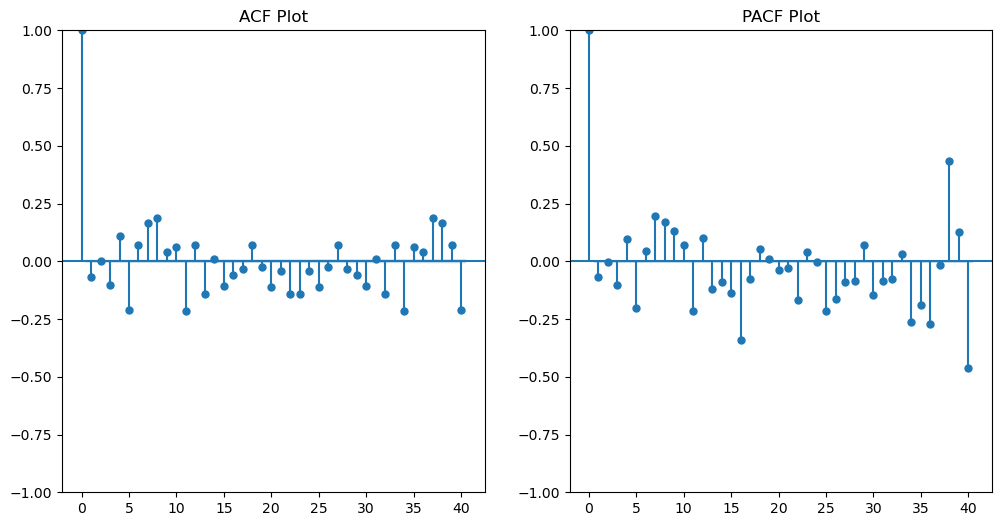

In [89]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(chunk_df['Weekly_Sales'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(chunk_df['Weekly_Sales'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.show()

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are commonly used in time series analysis to identify the correlation between observations at different lags and to help in identifying the order of an ARIMA model.

### ACF Plot (Autocorrelation Function):
The ACF plot shows the correlation between the time series observations at different lags. It is useful for identifying the MA (Moving Average) component of the ARIMA model.

- **Lag 0**: The autocorrelation at lag 0 is always 1 because it represents the correlation of the series with itself.
- **Positive or Negative Peaks**: Peaks outside the blue confidence bounds indicate significant autocorrelations. Significant lags can be considered for the MA part of the ARIMA model.
- **Decay Pattern**: If the ACF shows a slow decay, it indicates that the series may be non-stationary.

### PACF Plot (Partial Autocorrelation Function):
The PACF plot shows the correlation between the time series observations at different lags after removing the effects of shorter lags. It is useful for identifying the AR (Auto-Regressive) component of the ARIMA model.

- **Lag 0**: The partial autocorrelation at lag 0 is always 1 because it represents the correlation of the series with itself.
- **Significant Lags**: Peaks outside the blue confidence bounds indicate significant partial autocorrelations. Significant lags can be considered for the AR part of the ARIMA model.
- **Cutoff Pattern**: If the PACF shows a sharp cutoff after a few lags, it indicates the order of the AR process.

### Interpretation:

- In the ACF plot, there are significant spikes at several lags (e.g., around lag 7, 16, 24, 30). This suggests that the time series has significant autocorrelations at these lags, which might be indicative of an MA process.
- In the PACF plot, there are significant spikes at a few lags (e.g., lag 1, 7, 35). This suggests that the time series has significant partial autocorrelations at these lags, which might be indicative of an AR process.

### Model Order Selection:
Based on the ACF and PACF plots, you can determine the order of the ARIMA model:

- **AR Order (p)**: The number of significant lags in the PACF plot. In this case, it might be around 1 or 2.
- **MA Order (q)**: The number of significant lags in the ACF plot. In this case, it might be around 1 or 2.
- **Differencing (d)**: The ACF plot does not show a clear pattern of slow decay, suggesting that differencing might not be necessary (d=0). However, this should be confirmed with further analysis.

### Conclusion:
The ACF and PACF plots provide a visual tool to help identify the appropriate order of an ARIMA model. In your case, you might consider starting with an ARIMA model with parameters around (p=1, d=0, q=1) or (p=2, d=0, q=2) and then refine the model based on the performance metrics and residual diagnostics.

Would you like to proceed with further model refinement, or is there any specific aspect you would like to explore further?

# Arima and XGBoost model

In [90]:
# Example of fitting ARIMA models with different orders
orders = [(1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2)]
results = {}

for order in orders:
    model = ARIMA(chunk_df['Weekly_Sales'], order=order)
    result = model.fit()
    results[order] = {
        'AIC': result.aic,
        'BIC': result.bic,
        'MSE': np.mean((chunk_df['Weekly_Sales'] - result.fittedvalues)**2)
    }

best_order = min(results, key=lambda x: results[x]['AIC'])
print(f"Best Order: {best_order}, Results: {results[best_order]}")


C:\Users\khush\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\khush\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khush\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khush\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\khush\anaconda3\Lib\s

Best Order: (2, 1, 2), Results: {'AIC': 2905857.139368721, 'BIC': 2905904.7039460456, 'MSE': 241506797861.10336}


We have got (2,1,2) as the best ARIMA order.
 Results: {'AIC': 2905857.139368721, 'BIC': 2905904.7039460456, 'MSE': 241506797861.10336}

In [ ]:
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

def process_chunk(chunk_df):
    
    chunk_df['Date'] = pd.to_datetime(chunk_df['Date'])
    chunk_df.set_index('Date', inplace=True)
    
    chunk_df = chunk_df.groupby(chunk_df.index).agg('sum')

    chunk_df.sort_index(inplace=True)
    chunk_df = chunk_df.asfreq('D', fill_value=0) 

    if chunk_df.empty:
        print("The chunk_df is empty after setting frequency.")
        return chunk_df
    
    
    chunk_df['Lag1'] = chunk_df['Weekly_Sales'].shift(1)
    chunk_df['Lag2'] = chunk_df['Weekly_Sales'].shift(2)
    
    chunk_df = chunk_df.dropna()
    
    if chunk_df.empty:
        print("The chunk_df is empty after creating lag features and dropping NaNs.")
        return chunk_df

    try:
        arima_model = ARIMA(chunk_df['Weekly_Sales'], order=(2, 1, 1))  
        arima_result = arima_model.fit()
        chunk_df['ARIMA_Residuals'] = arima_result.resid
    except Exception as e:
        print(f"Error fitting ARIMA model: {e}")
        return chunk_df
    
    return chunk_df


for chunk_index in range(350):
    chunk_path = cleaned_chunk_path_template.format(chunk_index=chunk_index)
    
    if os.path.exists(chunk_path):
        print(f'Processing {chunk_path}')
        chunk_df = pd.read_csv(chunk_path)
        
        # Process the chunk
        chunk_df = process_chunk(chunk_df)
        
        if chunk_df.empty:
            print(f"Processed chunk {chunk_index} is empty after processing.")
            continue
        
        # Include categorical features
        chunk_df = pd.get_dummies(chunk_df, columns=['item_id', 'dept_id', 'weekday'], drop_first=True)
        
        # Prepare data for XGBoost
        X = chunk_df[['Lag1', 'Lag2', 'Holiday_Flag'] + [col for col in chunk_df.columns if col.startswith('item_id_') or col.startswith('dept_id_') or col.startswith('weekday_')]]
        y = chunk_df['ARIMA_Residuals']
        
        if X.empty or y.empty:
            print(f"Feature or target set is empty for chunk {chunk_index}.")
            continue
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train XGBoost model
        xgb_model = xgb.XGBRegressor()
        xgb_model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred = xgb_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'MSE for chunk {chunk_index}: {mse}')
        
        # Optionally save the results of this chunk
        results_path = os.path.join(directory, f'results_chunk_{chunk_index}.csv')
        chunk_df.to_csv(results_path)
        print(f'Saved results for chunk {chunk_index} to {results_path}')
        
    else:
        print(f'File not found: {chunk_path}')

print("Processing complete.")


Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_0.csv
The chunk_df is empty after creating lag features and dropping NaNs.
Processed chunk 0 is empty after processing.
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_1.csv
MSE for chunk 1: 4.874978386471213e-08
Saved results for chunk 1 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_1.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_2.csv
MSE for chunk 2: 4.001413204709657e-08
Saved results for chunk 2 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_2.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_3.csv
MSE for chunk 3: 4.057502862035139e-08
Saved results for chunk 3 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_3.csv
Processing C:\Users\kh

The chunk_df is empty after creating lag features and dropping NaNs.
Processed chunk 33 is empty after processing.
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_34.csv
MSE for chunk 34: 4.207479903377369e-08
Saved results for chunk 34 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_34.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_35.csv
MSE for chunk 35: 1.5417435693486972e-08
Saved results for chunk 35 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_35.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_36.csv
MSE for chunk 36: 1.5645693575620673e-09
Saved results for chunk 36 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_36.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_37.csv
The ch

MSE for chunk 66: 2.3378356631764083e-08
Saved results for chunk 66 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_66.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_67.csv
MSE for chunk 67: 6.961531466087925e-09
Saved results for chunk 67 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_67.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_68.csv
MSE for chunk 68: 1.9479845096999077e-12
Saved results for chunk 68 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_68.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_69.csv
The chunk_df is empty after creating lag features and dropping NaNs.
Processed chunk 69 is empty after processing.
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_70.csv
MSE fo

MSE for chunk 98: 1.29314096859767e-08
Saved results for chunk 98 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_98.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_99.csv
MSE for chunk 99: 5.1749550033663874e-09
Saved results for chunk 99 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_99.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_100.csv
MSE for chunk 100: 1.250505381103701e-09
Saved results for chunk 100 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_100.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_101.csv
The chunk_df is empty after creating lag features and dropping NaNs.
Processed chunk 101 is empty after processing.
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_102.csv
M

MSE for chunk 130: 2.1764098752442813e-08
Saved results for chunk 130 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_130.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_131.csv
MSE for chunk 131: 2.1067225418974585e-08
Saved results for chunk 131 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_131.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_132.csv
MSE for chunk 132: 8.078195797236695e-09
Saved results for chunk 132 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_132.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_133.csv
MSE for chunk 133: 1.844358106189028e-09
Saved results for chunk 133 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_133.csv
Processing C:\Users\khush\Documents\Project\Dem

MSE for chunk 163: 1.157672208792686e-09
Saved results for chunk 163 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_163.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_164.csv
MSE for chunk 164: 1.2475410322898637e-09
Saved results for chunk 164 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_164.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_165.csv
MSE for chunk 165: 1.0141443540659572e-09
Saved results for chunk 165 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_165.csv
Processing C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\cleaned_chunk_166.csv
MSE for chunk 166: 8.184547856122161e-10
Saved results for chunk 166 to C:\Users\khush\Documents\Project\Demand Forecasting\Datasets\chunks\results_chunk_166.csv
Processing C:\Users\khush\Documents\Project\Dem

# IMPROVEMENTS:

Improving the forecasting accuracy of your ARIMA model can involve several strategies. Here are some potential future improvements:

1. **Model Selection and Tuning**:
   - **Hyperparameter Tuning**: Experiment with different orders of ARIMA (p, d, q) parameters. Use grid search or automated tools like auto.arima in R to find the best parameters.
   - **Seasonal ARIMA (SARIMA)**: If there are seasonal patterns, consider using SARIMA, which incorporates seasonality into the ARIMA model.
   
2. **Incorporate External Variables**:
   - **Exogenous Variables (ARIMAX)**: Include additional variables that might impact sales (e.g., marketing spend, holidays, economic indicators).
   
3. **Advanced Time Series Models**:
   - **Exponential Smoothing Models**: Consider models like Holt-Winters exponential smoothing if trends and seasonality are significant.
   - **Machine Learning Models**: Explore machine learning approaches such as Random Forest, Gradient Boosting, or Neural Networks (LSTM, GRU).

4. **Data Preprocessing**:
   - **Data Smoothing**: Use techniques like moving averages to smooth the data and reduce noise.
   - **Handling Missing Values**: Ensure any missing values are properly imputed or accounted for.

5. **Model Evaluation**:
   - **Cross-Validation**: Use time series cross-validation to better evaluate model performance.
   - **Ensemble Methods**: Combine forecasts from multiple models to improve accuracy.

6. **Outlier Detection**:
   - **Identify and Treat Outliers**: Detect outliers and treat them separately to prevent them from skewing the model.

7. **Longer Training Period**:
   - **Extended Training Data**: Use a longer historical dataset for training to capture more trends and patterns.

8. **Feature Engineering**:
   - **Create Additional Features**: Engineer new features from the existing time series data, such as lagged variables, rolling means, or seasonal indicators.




